In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [ ]:
# Load data
train = pd.read_csv("fraudTrain.csv")
test = pd.read_csv("fraudTest.csv")

In [ ]:
# Combine train and test data for preprocessing
data = pd.concat([train, test])
data.describe()

In [ ]:
#shape
print(train.shape)
print(test.shape)

In [ ]:
display(data.head())
print(data.describe())
print(data.isnull().sum())

In [ ]:
# Label Encoding for categorical variables
label_encoders = {}
label_encode_cols = ['merchant', 'category', 'gender', 'state', 'job']
for col in label_encode_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
# Date and Time feature extraction
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['dob'] = pd.to_datetime(data['dob'])

data['transaction_year'] = data['trans_date_trans_time'].dt.year
data['transaction_month'] = data['trans_date_trans_time'].dt.month
data['transaction_day'] = data['trans_date_trans_time'].dt.day
data['transaction_hour'] = data['trans_date_trans_time'].dt.hour

data['birth_year'] = data['dob'].dt.year
data['birth_month'] = data['dob'].dt.month
data['birth_day'] = data['dob'].dt.day

In [ ]:
# Drop irrelevant columns
data.drop(['trans_date_trans_time', 'dob', 'first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)

In [ ]:
# Check for NaN values in the target variable
print(data['is_fraud'].isnull().sum())

2


In [ ]:
# Drop rows with NaN values in the target variable
data = data.dropna(subset=['is_fraud'])

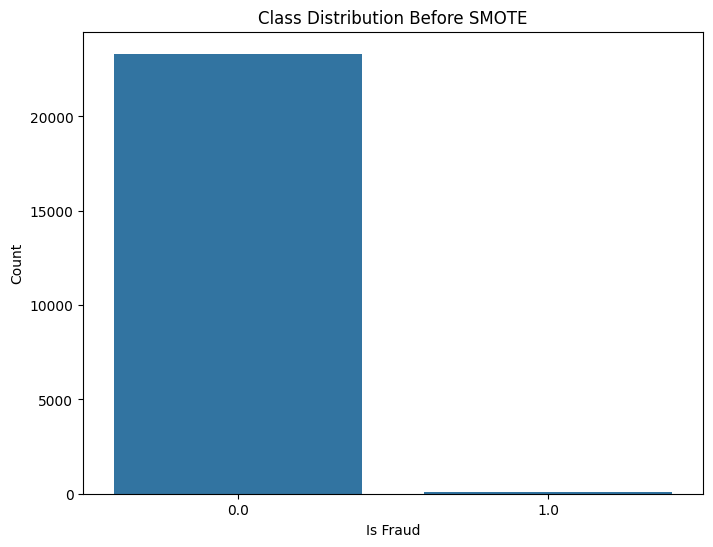

In [ ]:
# Plotting the class distribution before SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='is_fraud')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

In [ ]:
# Handling imbalanced data using SMOTE
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

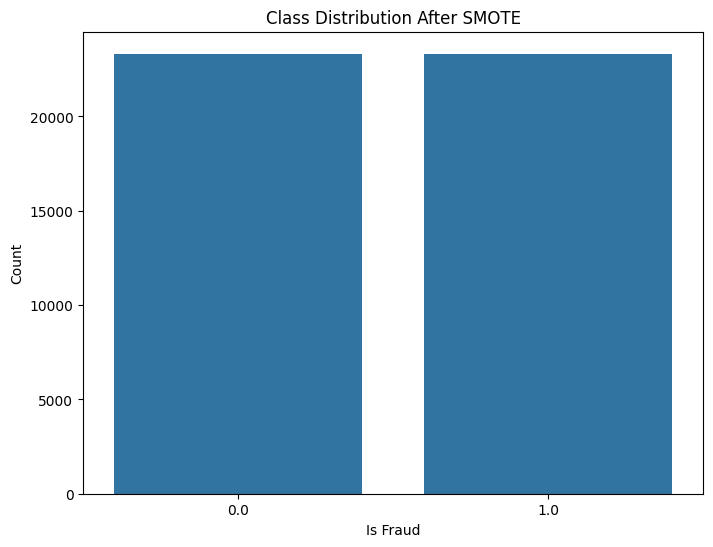

In [ ]:
# Plotting the class distribution after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Training models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [ ]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Evaluating models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\n")

In [ ]:
# Visualization
sns.countplot(data=data, x='is_fraud')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

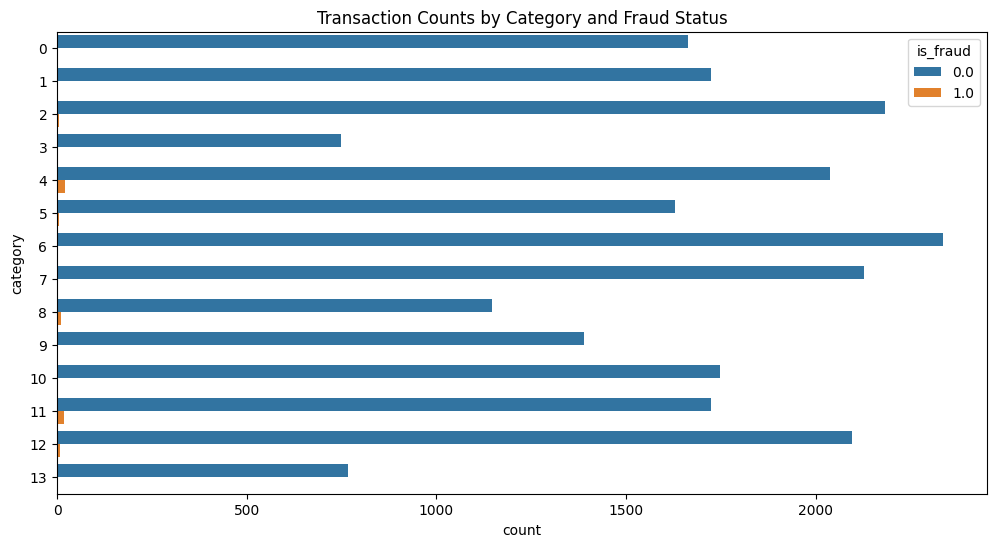

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='category', hue='is_fraud')
plt.title('Transaction Counts by Category and Fraud Status')
plt.xticks(rotation=0)
plt.show()

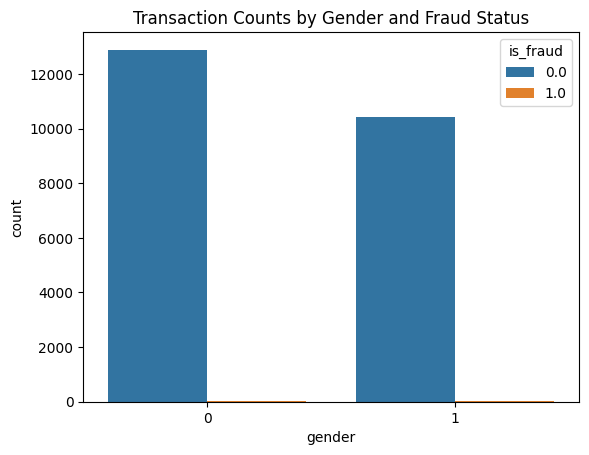

In [ ]:
sns.countplot(data=data, x='gender', hue='is_fraud')
plt.title('Transaction Counts by Gender and Fraud Status')
plt.show()

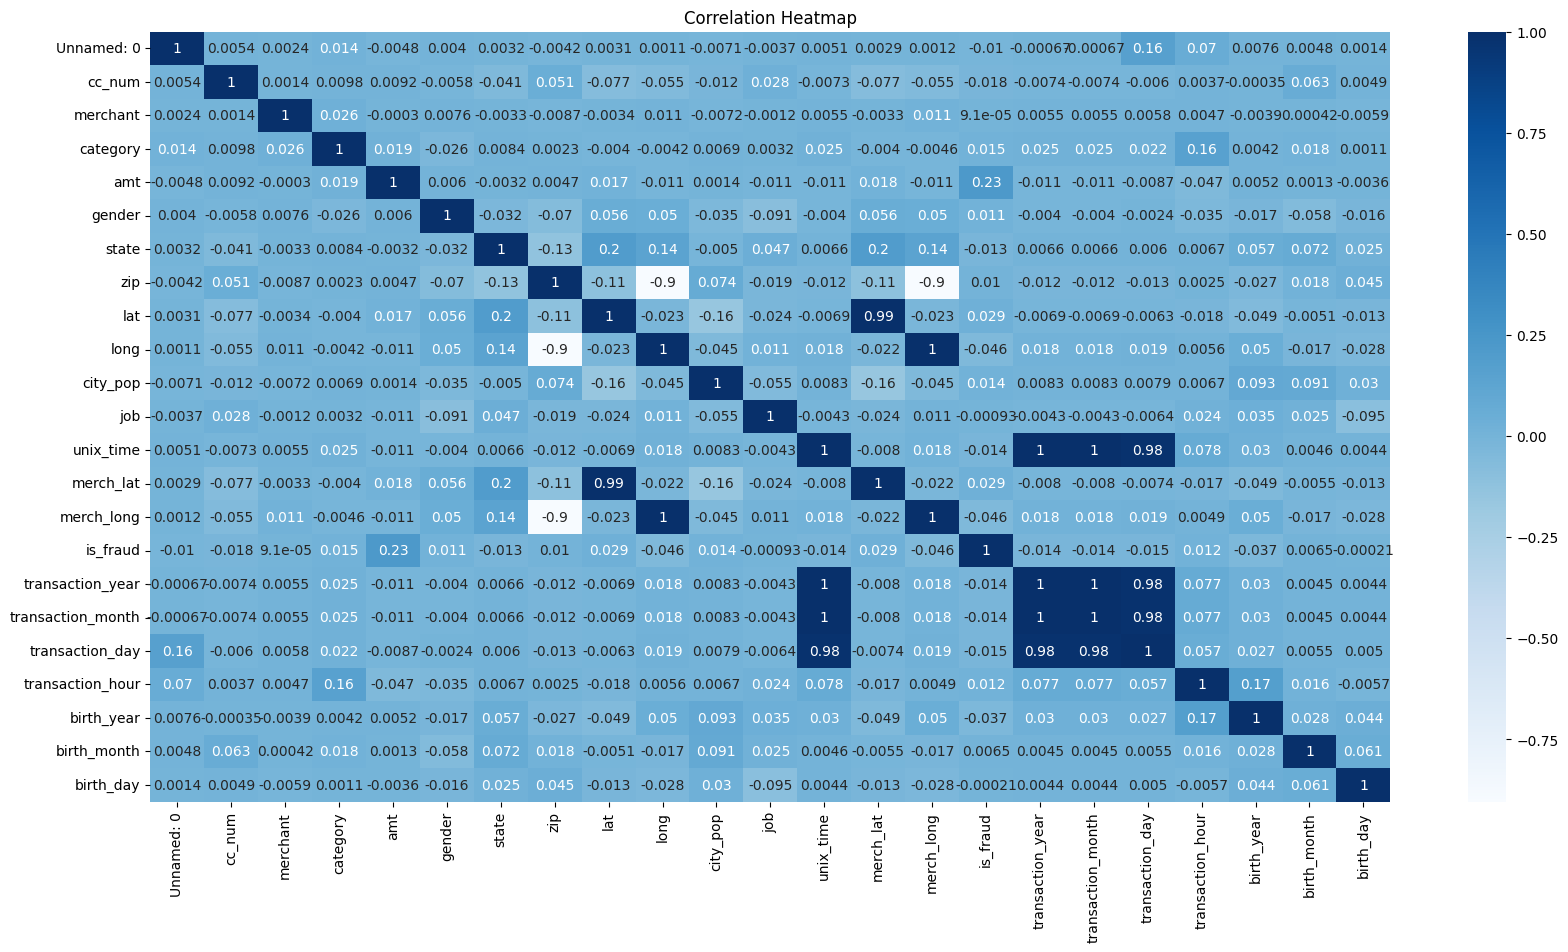

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

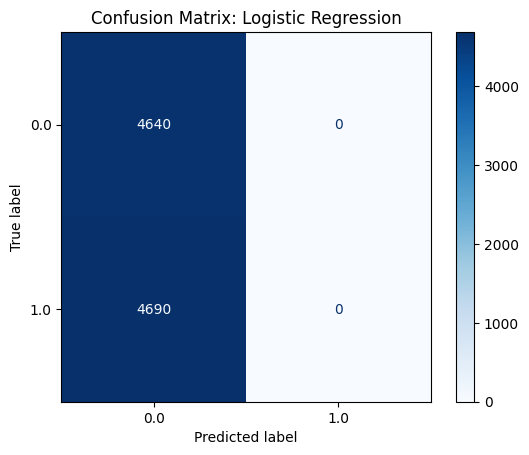

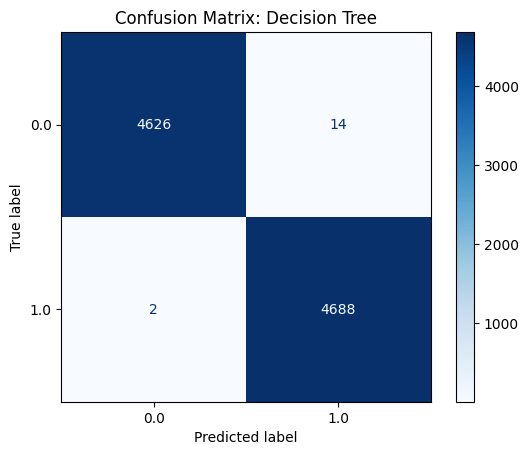

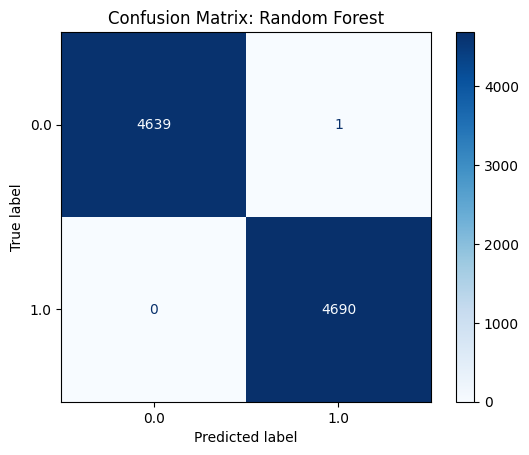

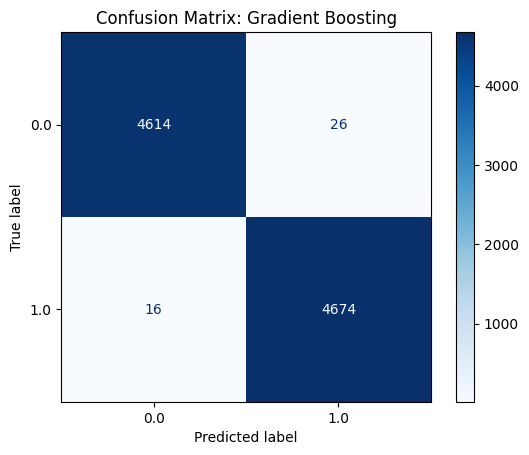

In [ ]:
# Plot confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: {name}')
    plt.show()